In [1140]:
%load_ext autoreload
%autoreload 2
from doclassifier import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
freqs = get_freqs()

In [952]:
path_name = '/Users/jordanvalansi/Downloads/Thoughts' 
text_dict = get_texts(path_name, split_level='sentence')
texts = [text for name, texts in text_dict.items() for text in texts]
texts_words = [ re.split('[\s'+string.punctuation+']+', text) for text in texts]
words = [w for text in texts_words for w in text]
c = collections.Counter(words)
# c2 = {w: sum([w in text_words for text_words in texts_words]) for w in c}
# c2 = {k: v for k, v in c2.items() if v>3}
# #bigrams = [b for l in texts for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
# freqs = get_freqs()
# c3 = df_idf(c2, freqs)
# for k,v in c3.most_common(100):
#     print("{} {}".format(k,v))



/Users/jordanvalansi/Downloads/Thoughts/.DS_Store Not added
/Users/jordanvalansi/Downloads/Thoughts/logical fallacies.xlsx Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing(2).jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing(1).jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled spreadsheet.xlsx Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing.jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Letter Origin.jpg Not added


In [938]:
para_dict = get_texts(path_name, split_level='paragraph')

/Users/jordanvalansi/Downloads/Thoughts/.DS_Store Not added
/Users/jordanvalansi/Downloads/Thoughts/logical fallacies.xlsx Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing(2).jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing(1).jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled spreadsheet.xlsx Not added
/Users/jordanvalansi/Downloads/Thoughts/Untitled drawing.jpg Not added
/Users/jordanvalansi/Downloads/Thoughts/Letter Origin.jpg Not added


In [941]:
paragraphs = [text for name, texts in para_dict.items() for text in texts]

In [940]:
sum([len(v) for v in para_dict.values()])

840

In [160]:
len(texts_words)

5066

In [178]:
from yandex_translate import YandexTranslate, YandexTranslateException

In [163]:
translate = YandexTranslate('trnsl.1.1.20181224T230635Z.693eab4c8554b089.84d0171c058028fc88a5905d980a60d305fdfad1')

In [175]:
en_sents = translate.translate(texts, 'en')['text']

YandexTranslateException: ERR_TEXT_TOO_LONG

In [255]:
en_sents = []
N = 10
for i in tqdm(range(len(texts)//N+1)):
    try:
        en_sents.append(translate.translate(texts[i*N:(i+1)*N], 'en')['text'])
    except YandexTranslateException as e:
        print(i)
        print(e)

HBox(children=(IntProgress(value=0, max=507), HTML(value='')))

In [257]:
len(en_sents)

5066

In [256]:
en_sents = [en_sent for sent in en_sents for en_sent in sent]


In [317]:
with open('data/sents_orig.txt', 'w') as f:
    f.write('\n'.join(texts))

In [260]:
with open('data/sents.txt', 'w') as f:
    f.write('\n'.join(en_sents))

In [248]:
texts.index('קשרים בין מושגים')

1

In [254]:
en_sents[12]

'Or you can think about it like Buffett'

In [133]:
import textblob

In [1103]:
tb = textblob.TextBlob('שלום')

In [1104]:
tb.translate(to='en')

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=167841.310495


HTTPError: HTTP Error 503: Service Unavailable

In [1100]:
en_blobs = []
for text in tqdm(texts):
    tb = textblob.TextBlob(text)
    try:
        en_blobs.append(tb.translate(to='en'))
    except textblob.exceptions.NotTranslated:
        en_blobs.append(text)

HBox(children=(IntProgress(value=0, max=5084), HTML(value='')))

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=25365.413803
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=408205.2547
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=313876.194922
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=108542.496768
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=456522.50228
http://translate.google.

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=459626.77844
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=173511.300729
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=147835.291333
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=240694.368456
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=412114.31404
http://translate.googl

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=472681.66839
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=746213.872859
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=810236.683906
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=750893.869971
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=88097.486239
http://translate.googl

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=461290.80532
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=45502.426688
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=3946.408596
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=236886.372264
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=36065.442271
http://translate.google.c

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=189165.315795
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=242117.361147
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=528458.926516
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=180529.324175
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=212787.330829
http://translate.goo

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=314237.194563
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=100760.506598
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=308474.165764
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=204716.339154
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=624607.1029281
http://translate.go

http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=906912.779742
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=571127.951689
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=140861.267587
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=774026.916724
http://translate.google.com/translate_a/t?client=webapp&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1&sl=auto&tl=en&hl=en&tk=717415.835865
http://translate.goo

HTTPError: HTTP Error 503: Service Unavailable

In [7]:
en_texts = [en_blob if type(en_blob) is str else en_blob.raw for en_blob in en_blobs]

In [1106]:
len(text_dict)

218

In [1107]:
en_texts_df = pd.DataFrame(en_texts, index=text_dict)

In [1108]:
en_texts_df.head()

,0
איך ללמוד.docx,Concepts\nConnections between concepts
טענה_.docx,claim:\nOr you could think of it like Buffett\...
מה אני עושה עם החיים האלה.docx,What am I doing with this life?\nDo not know
cloud ide.docx,I would like it to be a wonderful year\nWhat t...
אני לא יודע.docx,I do not know\nI think it's slower to write li...


In [1109]:
en_texts_df.to_csv('data/en_sents_textblob.csv')

In [1135]:
en_texts = list(en_texts_df[0])

In [1120]:
len([t for text in texts for t in text.split('\n') if t])

5128

In [1121]:
en_sents_textblob = [t for text in en_texts for t in text.split('\n') if t]
fnames = [fname for fname,text in zip(text_dict,en_texts) for t in text.split('\n') if t]
len(pd.DataFrame(en_sents_textblob, index=fnames))

5112

In [1138]:
for en_text, (fname,text) in zip(en_texts, text_dict.items()):
    print(fname)
    en_text = list(filter(None, en_text.split('\n')))
    if len(en_texts) != len(text):
        print(en_texts)
        print(text)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [105]:
from nltk.tokenize import word_tokenize

In [369]:
from wordfreq import tokenize

In [8]:
en_texts_words = [tokenize(en_text, 'en') for en_text in en_texts]

In [178]:
texts_words[5].count('הייתי')

3

In [213]:
freqs['נגישה']

17

In [10]:
get_top_words(texts_words[5], freqs, 5)

['פונקציה', 'דיפ', 'השלבים', 'הוספת', 'דאטה']

In [149]:
word_frequency('OOO0OOOOOOOOOo', 'en', minimum=1e-08)


1e-08

In [9]:
from collections import defaultdict
text_dict = defaultdict(list)
for text_words, text in zip(en_texts_words, texts):
    names = get_top_words(text_words)
    text_dict[' '.join(names)].append(text)



In [10]:
setTexts('/Users/jordanvalansi/Downloads/Thoughts7/', text_dict)

HBox(children=(IntProgress(value=0, max=213), HTML(value='')))

In [66]:
lemmas = map(remove_prefix, words) 
c1 = collections.Counter(lemmas)

In [481]:

texts_array = np.array([np.array(text_words) for text_words in texts_words])

In [484]:
all_words = list(set([word for text_words in texts_words for word in text_words]))

In [732]:
texts_words[0]

['מושגים', 'קשרים', 'בין', 'מושגים', '']

In [733]:
freqs['מושגים']

17

In [13]:
one_hot = words2one_hot(texts_words[0], freqs)

In [14]:
one_hot[list(freqs.keys()).index('מושגים')]

0.11764705882352941

In [15]:
texts_one_hot = np.array([words2one_hot(words, freqs) for words in tqdm(texts_words)])

HBox(children=(IntProgress(value=0, max=218), HTML(value='')))

In [16]:
from sklearn.metrics import pairwise_distances
distmat = pairwise_distances(texts_one_hot, metric='cosine')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


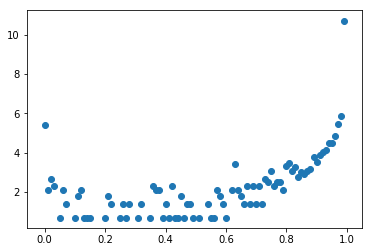

In [19]:
y, x = np.histogram(distmat,bins=100)
plt.scatter(x[:100], np.log(y))
plt.show()

In [24]:
clusters = set([tuple(np.where(dists<.99)[0]) for dists in distmat])

In [25]:
min_clusters = defaultdict(set)
included = set()
for cluster in clusters:
    name = list(cluster)[0]
    if name in included:
        continue
    included.update(cluster)
    min_clusters[name].update(cluster)


In [26]:
min_clusters = {name: cluster for name,cluster in min_clusters.items() if len(cluster)>1}

In [41]:
len(min_clusters)

42

In [40]:

setTexts(path_name='/Users/jordanvalansi/Downloads/Thoughts4/', text_dict=gen_text_dict(min_clusters, texts_words, texts, freqs))

/Users/jordanvalansi/projects/notebooks/doclassifier.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  tfs = [words.count(word)/np.log(freqs[word]) for word in uniqs]


HBox(children=(IntProgress(value=0, max=31), HTML(value='')))

In [722]:
distmat[i,j]

0.9932099254823237

In [46]:
i = 2
texts_words[i]

['מה', 'אני', 'עושה', 'עם', 'החיים', 'האלה', 'לא', 'יודע', '']

In [47]:
j = get_nearest_neighbour(distmat, i)

In [48]:
texts_words[j]

['אז', 'מה', 'אני', 'עושה', 'עם', 'חיי', '']

In [79]:
# distance is word match
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(en_texts)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T


In [81]:
i = 3
texts[i]

'הייתי רוצה שתהיה זו שנה נפלאה\nמה קשור?\nהייתי רוצה לכתוב בפלטפורמה שגם מאפשרת לי לכתוב קוד, אבל מצד שני נגישה מכל מקום\nהייתי רוצה ide בענן\nהאמת שהworkplace בענן אז בתכלס אני יכול לערוך את המסמכים מכל מקום\nאיך אני עורך מסמכים מהdropbox?\nאז מסתבר שאפשר\n\nטוב בינתיים שאני מריץ קוד, יותר בעייתי לכתוב\n'

In [83]:
ps = pairwise_similarity[i].toarray()[0]
other = ps.argsort()[-2:][0]

In [84]:
texts[other]

"הלוואי שהייתי יכול לכתוב קוד, שיהווה לי מקום לכתיבת מסמכים וקוד, ולהרצת קוד\nאני יכול לעשות דבר כזה\nבאמצעות ג'אווה סקריפט, אני יכול לעשות אתר שמאפשר כתיבת מסמכים ושמירתם\nהאתר יכול לשבת בענן\nאני יכול לאפשר לאתר הזה גם לכתוב אתרים, כי הרי בסוף זה פשוט הוספת מסמכי ג'אוה סקריפט\nאבל אני צריך ךהבין איך יוצרים אפשליקציה בנוד ג'.ס\nאני יכול לככה בקלות להוסיף עוד קוד לאפליקציה מתוך האפליקציה\nאני יכול להוסיף כתובת שלמשל משתמשת בגוגל אימג' כדי למצוא בן אדם לפי תמונה או לינק (למשל לפייסבוק) ואז נניח ליישם את זה בכיוון של פורנו\nאבל זה קשה ללמוד את הג'.ס הזה\nאני רוצה ליצור מזה משחק, שבמקום לעשות את הכלום שאני עושה כשאני משחק, אני אעשה את הכלום הזה במשחק שלי\nבמקום לרשום אני אעשה את זה במשחק\nמה העקרונות של משחק?\nתחושה של התקדמות\nשלבים קטנים (כל שלב כמה דקות קצרות)\nנניח בקנדי קראש\nהיו מלא שלבים שכל אחד משחקים חמש דק'\nותוך בממוצע חמש התורות שאפשר לשחק, עוברים שלב או שניים\nסכהכ צריך היה לשחק\n5*700/2 = 1750\nמשחקים כלומר 8750 דק' או 146 שעות\nהמשימה צריכה להיות פשוטה כדי לבצע אותה תוך חמש

In [424]:
tfid_df = pd.DataFrame(pairwise_similarity.toarray())

In [438]:
tfid_mat = tfid_df.values

In [442]:
texts[tfid_mat[i].argsort()[-2:][0]]

'אם נניח אני מכפיל את המכירות כל שנה\nאני צריך בשנה חמש 80000\nבשנה ארבע 40000\nבשנה שלוש 20000\nבשנה שניה 10000\nבשנה ראשונה 5000'

In [773]:
d = get_nn_dict(distmat)

In [774]:
clusters = []
while d:
    clusters.append(get_cluster(d))


In [775]:
len(clusters)

605

In [471]:
texts[585]

"ניצחתי את שירן בויכוח:\nאני אמרתי שמוניקה ורוס הם המרכז בחברים והיא אמרה שרייצ'ל בגלל הכסף, ואז אמרתי שכולם חברים רק בזכותם הם האמצע של החברות, והיא הסכימה איתי"

In [472]:
texts[402]

'But what do I do on that week?'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


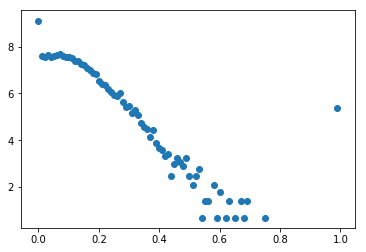

In [89]:
y, x = np.histogram(pairwise_similarity.todense(), bins=100)
plt.scatter(x[:100], np.log(y))
plt.show()

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform


In [ ]:
tfid_df = np.round(tfid_df-1, decimals=3)

In [428]:
np.fill_diagonal(tfid_df.values, 0)

In [450]:
tfid_df.values[:] = np.abs(tfid_df.values)

In [50]:
dist_flat = squareform(distmat)
links = linkage(dist_flat, method='ward')

In [52]:
import fastcluster
Z = fastcluster.linkage(dist_flat, method="ward")
# some computation here, returning n (usually between 5-30)
# clusters = fastcluster.fcluster(Z, t=n, criterion='maxclust')


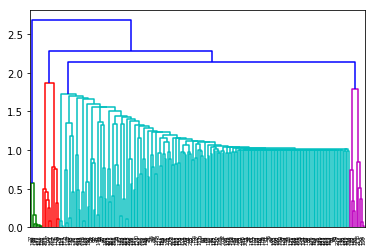

In [53]:
dend = dendrogram(Z)

In [795]:
dend.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [54]:
clusters = defaultdict(list)
for c,i in zip(dend['color_list'], dend['leaves']):
    clusters[c].append(i)

In [56]:
setTexts('/Users/jordanvalansi/Downloads/Thoughts5/', gen_text_dict(clusters, freqs=freqs, texts=texts, texts_words=texts_words))

/Users/jordanvalansi/projects/notebooks/doclassifier.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  tfs = [words.count(word)/np.log(freqs[word]) for word in uniqs]


HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

In [66]:
chunksize = 2 ** 10
fpath = '/Users/jordanvalansi/Downloads/cc.he.300.vec'
chunks = pd.read_csv(fpath, chunksize=chunksize, sep=' ', index_col=0, )
# df = pd.DataFrame()
# for chunk in tqdm(chunks):
#     df = pd.concat([df, chunk])
    
    

In [12]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

In [15]:
# wv_from_text = KeyedVectors.load_word2vec_format(datapath('/Users/jordanvalansi/Downloads/wiki.en.vec'), binary=False)

In [14]:
fpath = 'data/w2v.csv'
fpath = '/Users/jordanvalansi/Downloads/wiki.en.vec'
# fpath = '/Users/jordanvalansi/Downloads/cc.he.300.vec'
w2v = get_vecs(fpath, ' ')

HBox(children=(IntProgress(value=0, max=2519371), HTML(value='')))

In [16]:
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")

KeyboardInterrupt: 

In [17]:
len(w2v)

2519106

In [18]:
w2v_iter = iter(w2v)

In [21]:
next(w2v_iter)

'.'

In [24]:
from scipy.spatial import distance
w1 = 'silvester'
w2 = 'terror'
distance.cosine(w2v[w1], w2v[w2])

0.8489722599941599

In [123]:
vecs = []
for text in tqdm(en_texts_words):
    words = get_top_words(text, top=1)
    vec = text2vec(text, w2v)
    vecs.append(vec)

vecs_array = np.array(vecs)

HBox(children=(IntProgress(value=0, max=218), HTML(value='')))

In [124]:
vecs_array.shape

(218, 300)

In [157]:
vecs_df = pd.DataFrame(vecs)

In [161]:
np.dot(vecs_df.loc[5], vecs_df.loc[6])

1.6182148103503835e-05

In [111]:
texts[6]

'טוב בינתיים שאני מריץ קוד, יותר בעייתי לכתוב\n'

In [110]:
texts[5]

'הייתי רוצה שתהיה זו שנה נפלאה\nמה קשור?\nהייתי רוצה לכתוב בפלטפורמה שגם מאפשרת לי לכתוב קוד, אבל מצד שני נגישה מכל מקום\nהייתי רוצה ide בענן\nהאמת שהworkplace בענן אז בתכלס אני יכול לערוך את המסמכים מכל מקום\nאיך אני עורך מסמכים מהdropbox?\nאז מסתבר שאפשר'

In [72]:
vecs_df = vecs_df.fillna(vecs_df.mean())

In [308]:
dem_reduce = TSNE(n_components=2)

In [781]:
vecs_reduce = dem_reduce.fit_transform(word_vecs)

In [782]:
orig_cluster = pd.DataFrame(vecs_reduce)
orig_labels = pd.Series([0]*len(vecs_reduce))

In [115]:
orig_labels = split_largest(orig_labels, orig_cluster)

In [785]:
kmeans = KMeans(n_clusters=5).fit(word_vecs)
labels_ = pd.Series(kmeans.labels_)

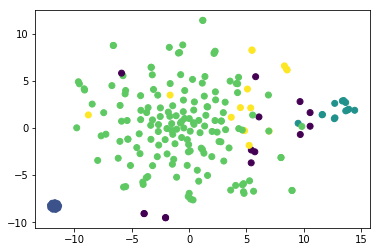

In [786]:
plt.scatter(orig_cluster.iloc[:, 0], orig_cluster.iloc[:, 1], c=labels_)
# plt.xlim(-50, 50)
# plt.ylim(-30, 30)
plt.show()

In [389]:
sum(orig_labels==orig_labels.max())

262

In [334]:
len(texts)

5066

In [345]:
len(labels_)

1331

In [392]:
orig_labels.max()

10

In [350]:
sent_df.shape

(1331, 1024)

In [346]:
texts_df = pd.DataFrame(texts)

In [356]:
sent_df.index[labels_==4]

Index(['s-10000-a-month-thats-120-grand-a-year-thats-about-3-percent-a-year-its-not-that-much-only-inflation-is-3-but-it-is-tied-to-inflation-so-basically-its-3-above-inflation.npy',
       's-2-million-so-that-shauna-wont-have-to-work.npy', 's-a-dream.npy',
       's-action-is-the-cortex.npy',
       's-all-i-need-is-to-download-all-the-information-daily-and-to-run-on-her-predictions.npy',
       's-also-dont-know-which-project-to-invest-in.npy',
       's-also-its-not-very-accessible-especially-when-theres-no-internet.npy',
       's-also-real-estate-the-estate.npy',
       's-and-around-the-average-chance-is-low-so-sure-hes-lower-on-the-edges.npy',
       's-and-then-i-started-to-look-at-things-that-make-scripts-for-apps.npy',
       ...
       's-we-need-protection-a-home-clothing-health.npy',
       's-were-basically-like-a-computer.npy',
       's-what-about-trading-software.npy',
       's-what-if-instead-of-objects-we-would-have-tables.npy',
       's-what-if-we-can-find-same-e

In [130]:
for i, (text, en_words, label) in enumerate(zip(texts, en_texts_words, labels_)):
    fpath = os.path.join('/Users/jordanvalansi/Downloads/Thoughts6', str(label))
    if not os.path.exists(fpath):
        os.makedirs(fpath)
    name = '_'.join(get_top_words(en_words))
    setText(fname=os.path.join(fpath, name+'.docx'), texts=[text])

In [357]:
sent_vecs = {}
fpath = '/Users/jordanvalansi/projects/tensorflow/models/research/lm_1b/output/'
for fname in os.listdir(fpath):
    sent_vecs[fname] = np.load(os.path.join(fpath,fname))[0]


In [358]:
sent_df = pd.DataFrame(sent_vecs).T

In [359]:
sent_df.shape

(2872, 1024)

In [360]:
distmat = distance_matrix(sent_df, sent_df)

In [298]:
d = get_nn_dict(distmat)

In [299]:
d

{0: 18,
 1: 10,
 2: 10,
 3: 10,
 4: 29,
 5: 128,
 6: 18,
 7: 25,
 8: 148,
 9: 348,
 10: 12,
 11: 10,
 12: 10,
 13: 328,
 14: 26,
 15: 93,
 16: 18,
 17: 39,
 18: 6,
 19: 15,
 20: 6,
 21: 6,
 22: 9,
 23: 24,
 24: 32,
 25: 34,
 26: 14,
 27: 93,
 28: 93,
 29: 15,
 30: 18,
 31: 288,
 32: 24,
 33: 38,
 34: 25,
 35: 41,
 36: 42,
 37: 340,
 38: 33,
 39: 17,
 40: 36,
 41: 35,
 42: 36,
 43: 40,
 44: 69,
 45: 44,
 46: 361,
 47: 348,
 48: 348,
 49: 348,
 50: 219,
 51: 145,
 52: 348,
 53: 24,
 54: 262,
 55: 304,
 56: 315,
 57: 162,
 58: 137,
 59: 348,
 60: 368,
 61: 317,
 62: 356,
 63: 78,
 64: 86,
 65: 189,
 66: 298,
 67: 259,
 68: 93,
 69: 379,
 70: 292,
 71: 348,
 72: 168,
 73: 151,
 74: 278,
 75: 181,
 76: 321,
 77: 348,
 78: 348,
 79: 348,
 80: 378,
 81: 348,
 82: 348,
 83: 86,
 84: 44,
 85: 48,
 86: 101,
 87: 326,
 88: 328,
 89: 304,
 90: 174,
 91: 350,
 92: 26,
 93: 15,
 94: 348,
 95: 106,
 96: 326,
 97: 356,
 98: 142,
 99: 122,
 100: 304,
 101: 86,
 102: 346,
 103: 337,
 104: 348,
 105: 338

In [306]:
i = 256
sent_df.index[i]

's-question-every-day-will-amount-to-4-weeks-5-days-20-questions.npy'

In [307]:
sent_df.index[d[i]]

's-im-working-on-this-project-trying-to-find-a-way-to-predict-stock.npy'

In [372]:
list(map(lambda x: get_top_words(tokenize(x, lang='en'), top=1), en_sents))

[['concepts'],
 ['concepts'],
 ['claim'],
 ['buffett'],
 ['start'],
 ['proof'],
 ['buffett'],
 ['invest'],
 ['recognition'],
 ['priority'],
 ['whereby'],
 ['doing'],
 ['know'],
 ['great'],
 ['what'],
 ['accessible'],
 ['ide'],
 ['edit'],
 ['edit'],
 ['apparently'],
 ['problematic'],
 ['know'],
 ['slower'],
 ['dictate'],
 ['dictate'],
 ['productive'],
 ['know'],
 ['facebook'],
 ['facebook'],
 ['lingo'],
 ['productive'],
 ['garageband'],
 ['politics'],
 ['automatically'],
 ["shouldn't"],
 ['phrases'],
 ['vector'],
 ['connection'],
 ['memorandum'],
 ['operator'],
 ['manny'],
 ['steps'],
 ['options'],
 ['predict'],
 ['kaggle'],
 ['insert'],
 ['predict'],
 ['assumptions'],
 ['epsilon'],
 ['epsilon'],
 ['opens'],
 ['negligible'],
 ['probability'],
 ['epsilon'],
 ['probability'],
 ['epsilon'],
 ['epsilon'],
 [],
 [],
 [],
 ['repeated'],
 ['processing'],
 ['questions'],
 ['weeks'],
 ['christmas'],
 ['christmas'],
 ['april'],
 ['amount'],
 ['questions'],
 ['question'],
 ['questions'],
 ['should

In [374]:
sents_df = pd.DataFrame(en_sents)

In [382]:
sents_df.iloc[1][0]

'Connections between concepts'

In [388]:
sents_df['tfidf'] = sents_df.apply(lambda x: get_top_words(tokenize(x[0], lang='en'), top=1)[0] if x[0] else None, axis=1)

In [608]:
sents_df.sample(10)

,0,tfidf
3567,I went out for a walk.,walk
3176,Don't know,know
2858,Girlfriend - various 5G = 1%,5g
2089,"I guess there isn’t but stuff can be voted, ac...",morals
3026,And he didn't realize that this is not glasses...,curves
2125,All these things exist. the desire to know.,desire
2638,"But I can't do anything there, because if it w...",iphone
4907,What can I do,do
2826,Construction and housing 2G,2g
3301,I still don't know exactly how to manage tasks.,tasks


In [617]:
sents_df = sents_df.rename_axis({0:'sent'}, axis=1)

In [610]:
sent_vec_df = sent_df

In [392]:
import gensim.downloader as api

In [409]:
model = api.load("fasttext-wiki-news-subwords-300")

[=================================================-] 100.0% 958.4/958.4MB downloaded


In [415]:
model.distance(w1='quantum', w2='algorithmic')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.49516016244888306

In [398]:

info = api.info()

In [1139]:
info['models']['glove-wiki-gigaword-100']

{'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)',
 'checksum': '40ec481866001177b8cd4cb0df92924f',
 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).',
 'file_name': 'glove-wiki-gigaword-100.gz',
 'file_size': 134300434,
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'num_records': 400000,
 'parameters': {'dimension': 100},
 'parts': 1,
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-100.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-100/__init__.py'}

In [408]:
info['models']['fasttext-wiki-news-subwords-300']

{'base_dataset': 'Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)',
 'checksum': 'de2bb3a20c46ce65c9c131e1ad9a77af',
 'description': '1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).',
 'file_name': 'fasttext-wiki-news-subwords-300.gz',
 'file_size': 1005007116,
 'license': 'https://creativecommons.org/licenses/by-sa/3.0/',
 'num_records': 999999,
 'parameters': {'dimension': 300},
 'parts': 1,
 'read_more': ['https://fasttext.cc/docs/en/english-vectors.html',
  'https://arxiv.org/abs/1712.09405',
  'https://arxiv.org/abs/1607.01759'],
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py'}

In [450]:
w2v_df = sents_df['tfidf'].apply(lambda x: pd.Series(model.wv[x]) if x in model.wv else pd.Series(model.wv['.']))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [448]:
type(word_vecs[0][0])

numpy.float32

In [ ]:
words = [word for text in en_sents for word in tokenize(text, 'en')]

In [ ]:
count_df = get_tfidf(en_sents)

In [602]:
count_df.sort('tfiedf', ascending=False)[count_df['count']>1].to_csv('data/tfidf.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [585]:
for text in en_sents:
    if 'shauna' in tokenize(text, 'en'):
        print(text)

What's most bothering me. I guess this is Shauna...
I would go back home to take a shit, but Shauna might be there.
2 million so that Shauna won't have to work
Shauna: how much toast do you want?
Shauna: how much toast do you want?
Shauna: how many pieces of toast you רוצההההההההההההה?
Shauna: yes it is.
Shauna: *shakes her head*
Shauna: *points at Jordan*
Shauna: *licking a knife in sensuality and you look looking buying.*
Shauna: *starts to deep throat with the knife.*
What do I do now when I'm with Shauna
I beat Shauna argument:
Until ~ten I ate dinner and saw a show with Shauna
Can I use it with Shauna?
I'm afraid of having kids, and Shauna nervous about it.


In [922]:
sents_df = sents_df.join(pd.DataFrame([[vi, k] for k,v in text_dict.items() for vi in v], columns=['he_sent', 'fname']))

ValueError: columns overlap but no suffix specified: Index(['he_sent', 'fname'], dtype='object')

In [914]:
word_dict = pd.read_csv('data/thoughts words - tfidf.csv', index_col=0, usecols=['word','Topic']).dropna().to_dict()['Topic']

In [913]:
word_dict

{'0.5h': 'project management',
 '1000w': 'physics',
 '100k': 'money',
 '10k': 'money',
 '10kwh': 'physics',
 '160k': 'money',
 '200k': 'money',
 '20k': 'money',
 '300k': 'money',
 '30k': 'money',
 '36k': 'money',
 '401k': 'money',
 '48k': 'money',
 '50k': 'money',
 '7k': 'money',
 '9k': 'money',
 'adrenaline': 'biology',
 'apartment': 'real estate',
 'apartments': 'real estate',
 'api': 'code',
 'apps': 'code',
 'arabs': 'politics',
 'artificial': 'ml',
 'asana': 'project management',
 'bananas': 'food',
 'bedroom': 'real estate',
 'bitches': 'hobby',
 'blender': 'art',
 'bonobo': 'biology',
 'bookmarks': 'project management',
 'bot': 'ml',
 'bots': 'ml',
 'brain': 'biology',
 'bucks': 'money',
 'buffett': 'money',
 'bug': 'code',
 'calorie': 'food',
 'calories': 'food',
 'capitalism': 'sociology',
 'carbon': 'biology',
 'chimp': 'biology',
 'civilization': 'sociology',
 'cocain': 'hobby',
 'code': 'code',
 'collision': 'physics',
 'communism': 'sociology',
 'computation': 'code',
 'co

In [927]:
word_dict = word_df['nn'][word_df['nn']!='7k'].to_dict()

In [928]:
sents_df['words'] = sents_df.apply(lambda x: [word_dict[word] for word in set(tokenize(x['sent'], 'en')).intersection(word_dict.keys())], axis=1)

In [929]:
sents_df.head()

,sent,tfidf,words,he_sent,fname
0,Concepts,concepts,[],מושגים,איך ללמוד.docx
1,Connections between concepts,concepts,[],קשרים בין מושגים,איך ללמוד.docx
2,Claim:,claim,[],טענה:,טענה_.docx
3,Or you can think about it like Buffett,buffett,[investment],או שאפשר לחשוב על זה כמו באפט,טענה_.docx
4,Or you can do any start-up,start,[],או שאפשר לעשות כל סטארט אפ,טענה_.docx


In [930]:
fname_dict = sents_df.groupby('fname')['words'].sum().to_dict()

In [931]:
fname_dict = {k: set(v) for k,v in fname_dict.items()}

In [932]:
fname_dict

{'2nd law.docx': {'gaussian'},
 'API למשחק.docx': {'monkey'},
 'Civ.docx': {'joules', 'machine', 'stock', 'taxes'},
 'Data driven program.docx': set(),
 'Direct democracy_.docx': {'management'},
 'Dont-know.docx': {'investment', 'reproduction'},
 'Elastic collision.docx': {'consciousness'},
 'Employment types_.docx': {'investment', 'randomness'},
 'Entertainment - interesting, good information.docx': {'apartment',
  'investment',
  'joules',
  'management',
  'randomness',
  'reproduction',
  'taxes'},
 'Food.docx': {'stock'},
 'I don_t know.docx': {'culture', 'investment'},
 'I have so much on my mind.docx': set(),
 'Investments.docx': {'stock', 'taxes'},
 'Jacks or higher.docx': set(),
 'Ok שלום so what I wanted to say was they believe that justice is not being done_.docx': set(),
 'Omnipotence paradox.docx': set(),
 'Physics.docx': set(),
 'Politics.docx': {'20k',
  'consciousness',
  'investment',
  'management',
  'stock'},
 'QuoRdr_.docx': {'culture', 'kaggle', 'monkey'},
 'Rewar

In [670]:
collections.Counter([word for words in sents_df['words'] for word in words]).most_common()

[('money', 358),
 ('project management', 141),
 ('sociology', 107),
 ('physics', 106),
 ('nlp', 103),
 ('real estate', 103),
 ('biology', 97),
 ('hobby', 72),
 ('code', 59),
 ('statistics', 48),
 ('politics', 43),
 ('ml', 35),
 ('math', 35),
 ('food', 34),
 ('Shiran', 16),
 ('startup', 10),
 ('art', 4),
 ('logic', 3)]

In [671]:
count_df

,count,freq,log_freq,tfidf,tfiedf
word,,,,,
concepts,16,1.780000e-05,-10.936312,-1.463016,8.988764e+05
connections,4,2.190000e-05,-10.729024,-0.372820,1.826484e+05
between,65,6.610000e-04,-7.321757,-8.877651,9.833585e+04
claim,2,8.710000e-05,-9.348454,-0.213939,2.296211e+04
or,207,3.470000e-03,-5.663601,-36.549187,5.965418e+04
you,269,9.770000e-03,-4.628439,-58.118949,2.753327e+04
can,375,2.820000e-03,-5.871018,-63.873075,1.329787e+05
think,70,1.150000e-03,-6.767993,-10.342800,6.086957e+04
about,162,2.400000e-03,-6.032287,-26.855488,6.750000e+04


In [677]:
word_df = pd.DataFrame(list(word_dict.values()), index=word_dict.keys(), columns=['topic'])

In [681]:
word_df = word_df.replace({'real estate': 'property', 'project management':'project'})

In [689]:
def get_distance(w1, w2):
    try:
        return model.distance(w1, w2)
    except KeyError as e:
        print(e)
        return None
        
word_df.apply(lambda x: get_distance(x.name, x.topic) , axis=1)

"word 'gitlab' not in vocabulary"
"word 'kaggle' not in vocabulary"
"word 'rsu' not in vocabulary"
"word '0.5h' not in vocabulary"
"word '10kwh' not in vocabulary"
"word 'shauna' not in vocabulary"
"word 'zillow' not in vocabulary"
"word '1000w' not in vocabulary"
"word 'maslow' not in vocabulary"


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


realtor.com      5.646266e-01
gitlab                    NaN
kaggle                    NaN
rsu                       NaN
0.5h                      NaN
jira             8.963671e-01
10kwh                     NaN
cocain           7.467410e-01
shauna                    NaN
duplexes         6.003538e-01
zillow                    NaN
asana            9.095724e-01
shekels          5.249944e-01
zipline          7.463988e-01
joules           6.763077e-01
bonobo           6.335116e-01
bookmarks        7.401744e-01
gaussian         6.469696e-01
monogamy         6.488928e-01
1000w                     NaN
trac             6.165112e-01
9k               9.084195e-01
joule            6.696668e-01
maslow                    NaN
qr               1.014464e+00
gestalt          6.340638e-01
neuron           5.806776e-01
scheduler        6.297883e-01
turing           9.295797e-01
7k               9.006802e-01
                     ...     
money            0.000000e+00
income           4.353552e-01
hydrogen  

In [710]:
word_df.index.name='word'
word_df = word_df.reset_index()

In [712]:
word_vecs = word_df['word'].apply(lambda x: pd.Series(model.wv[x]) if x in model.wv else pd.Series(model.wv['.']))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [713]:
word_vecs.index = word_df['word']

In [902]:
topic_vecs = pd.Series(topics).apply(lambda x: pd.Series(model.wv[x]) if x in model.wv else pd.Series(model.wv['.']))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [908]:
word_df['nn'] = get_nns(word_vecs, topic_vecs)

In [891]:
topic_vecs.index[0]

'realtor.com'

In [892]:
topic_vecs.index.values[0]

'realtor.com'

In [787]:
word_df = word_df[(word_df['topic']!=word_df['nn']) & ((word_df['nn'] != 'nlp') & (word_df['nn'] != 'ml'))]

In [900]:
topics = [k for k,v in collections.Counter(word_df['nn']).items() if v>=3]

In [910]:
topics

['kaggle',
 'apartments',
 'palestinians',
 'emails',
 'reproduction',
 '7k',
 'joules',
 'consciousness',
 'management',
 'machine',
 'gaussian',
 'monkey',
 'stock',
 'randomness',
 'investment',
 'taxes',
 'apartment',
 'culture',
 '20k']

In [695]:

from scipy.spatial.distance import pdist

In [696]:
pdist(metric=get_distance, X=word_df.index)

ValueError: A 2-dimensional array must be passed.

In [ ]:
# split to paragraphs
# find tfidf word for paragraph
# find nearest neighbours for tfidfs
# get top nearest neighbours as labels
# label paragraphs
# name according to tfidf
# place paragraphs in dirs according to labels


In [949]:
sents_df[sents_df['he_sent'].apply(lambda x: '\n' in  x)]

,sent,tfidf,words,he_sent,fname
2305,Baby Talk: The 15 Most Common First Words\n1. ...,buba,[joules],Baby Talk: The 15 Most Common First Words\n1. ...,מסמך ללא שם(28).docx
3657,"nmod:poss(dog-2, My-1)\nnsubj(likes-4, dog-2)\...",sausage,[stock],"nmod:poss(dog-2, My-1)\nnsubj(likes-4, dog-2)\...",להפוך טקסט לגראף.docx
3664,"advmod(received-3, Generally-1)\nadvmod(receiv...",amod,[],"advmod(received-3, Generally-1)\nadvmod(receiv...",להפוך טקסט לגראף.docx


In [956]:
[text for text in texts if '\n' in text]

['\n',
 'Baby Talk: The 15 Most Common First Words\n1. Dad (or Dada, Daddy, Papa, etc.)\n2. Mom (or Mama, Mommy, Mum, etc.)\n3. Hi (or Hiya, Hey, Heya, Hello)\n4. Buba (or Bub or Baba)\n5. Dog (or Doggy, Puppy)\n6. Ball\n7. No\n8. Cat (or Kitty)\n9. Nana\n10. Bye\n11. Duck\n12. Ta (or Tata)\n13. Baby\n14. Uh oh\n15. Car',
 'nmod:poss(dog-2, My-1)\nnsubj(likes-4, dog-2)\nadvmod(likes-4, also-3)\nroot(ROOT-0, likes-4)\nxcomp(likes-4, eating-5)\ndobj(eating-5, sausage-6)',
 "advmod(received-3, Generally-1)\nadvmod(received-3, well-2)\nadvcl(considered-9, received-3)\ncase(critics-5, by-4)\nnmod(received-3, critics-5)\nnsubjpass(considered-9, Outliers-7)\nauxpass(considered-9, was-8)\nroot(ROOT-0, considered-9)\nadvmod(personal-11, more-10)\nxcomp(considered-9, personal-11)\ncase(works-16, than-12)\nnmod:poss(works-16, Gladwell-13)\ncase(Gladwell-13, 's-14)\namod(works-16, other-15)\nnmod(personal-11, works-16)\ncc(considered-9, and-18)\ndet(reviews-20, some-19)\nnsubj(commented-21, review

In [1009]:
vocab_df = pd.DataFrame(list(model.vocab.values()),index=list(model.vocab.keys()))

In [1011]:
vocab_df = vocab_df.reset_index()

In [1020]:
vocab_df = vocab_df.rename_axis({'index': 'word'}, axis=1)

In [1033]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [1035]:
# vocab_df.progress_apply(lambda x: model.most_similar(x['word'])[0], axis=1)

In [1043]:
topics_df = pd.DataFrame(topics)

In [1052]:
topics_df['similar'] = topics_df.progress_apply(lambda x: model.most_similar(x[0])[0][0] if x[0] in model.vocab else None, axis=1)

HBox(children=(IntProgress(value=0, max=19), HTML(value='')))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [1053]:
topics_df

,0,similar
0,kaggle,None
1,apartments,apartment
2,palestinians,palestinian
3,emails,e-mails
4,reproduction,reproductivity
5,7k,6k
6,joules,joule
7,consciousness,subconsciousness
8,management,managment
9,machine,machines


In [1054]:
topics_df['similar1'] = topics_df.progress_apply(lambda x: model.most_similar(x['similar'])[0][0] if x[0] in model.vocab else None, axis=1)

HBox(children=(IntProgress(value=0, max=19), HTML(value='')))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [1056]:
topics_df['similar2'] = topics_df.progress_apply(lambda x: model.most_similar(x['similar1'])[0][0] if x[0] in model.vocab else None, axis=1)

HBox(children=(IntProgress(value=0, max=19), HTML(value='')))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [1058]:
topics_df['similar3'] = topics_df.progress_apply(lambda x: model.most_similar(x['similar2'])[0][0] if x[0] in model.vocab else None, axis=1)

HBox(children=(IntProgress(value=0, max=19), HTML(value='')))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [1059]:
topics_df

,0,similar,similar1,similar2,similar3
0,kaggle,None,None,None,None
1,apartments,apartment,apartments,apartment,apartments
2,palestinians,palestinian,palestinians,palestinian,palestinians
3,emails,e-mails,emails,e-mails,emails
4,reproduction,reproductivity,self-reproduction,reproductivity,self-reproduction
5,7k,6k,7k,6k,7k
6,joules,joule,joules,joule,joules
7,consciousness,subconsciousness,consciousness,subconsciousness,consciousness
8,management,managment,management,managment,management
9,machine,machines,machine,machines,machine


In [1075]:
model.similar_by_vector(model.wv['king'] - model.wv['man'] + model.wv['woman'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('king', 0.8185327053070068),
 ('queen', 0.75703364610672),
 ('queen-mother', 0.6896808743476868),
 ('king-', 0.6787334680557251),
 ('queen-consort', 0.6555202007293701),
 ('monarch', 0.6455856561660767),
 ('kings', 0.6409086585044861),
 ('child-king', 0.6346831321716309),
 ('king-elect', 0.6344363689422607),
 ('boy-king', 0.630662739276886)]

In [1087]:
model.most_similar('animal')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('animal-', 0.8048739433288574),
 ('animals', 0.7860171794891357),
 ('wild-animal', 0.775835394859314),
 ('non-animal', 0.7738642692565918),
 ('food-animal', 0.7734631896018982),
 ('animal-human', 0.7691841721534729),
 ('man-animal', 0.7625933289527893),
 ('animal-care', 0.7621268033981323),
 ('animal-related', 0.7604922652244568),
 ('animal.', 0.748680055141449)]

In [1089]:
sents_df.to_csv('data/sents.csv')

In [1093]:
collections.Counter([w for words in list(sents_df['words']) for w in words]).most_common()

[('investment', 181),
 ('taxes', 155),
 ('machine', 141),
 ('management', 118),
 ('culture', 105),
 ('consciousness', 93),
 ('joules', 82),
 ('stock', 70),
 ('gaussian', 67),
 ('apartments', 65),
 ('apartment', 49),
 ('reproduction', 38),
 ('randomness', 33),
 ('monkey', 21),
 ('20k', 17),
 ('kaggle', 9),
 ('emails', 7),
 ('palestinians', 6)]